In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
mnist = tf.keras.datasets.mnist


(X_train , Y_train) , (X_test , Y_test) = mnist.load_data()
X_train , X_test = X_train / 255.0 , X_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


<ipython-input-9-9efd50fbcb3f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,4, i+1)


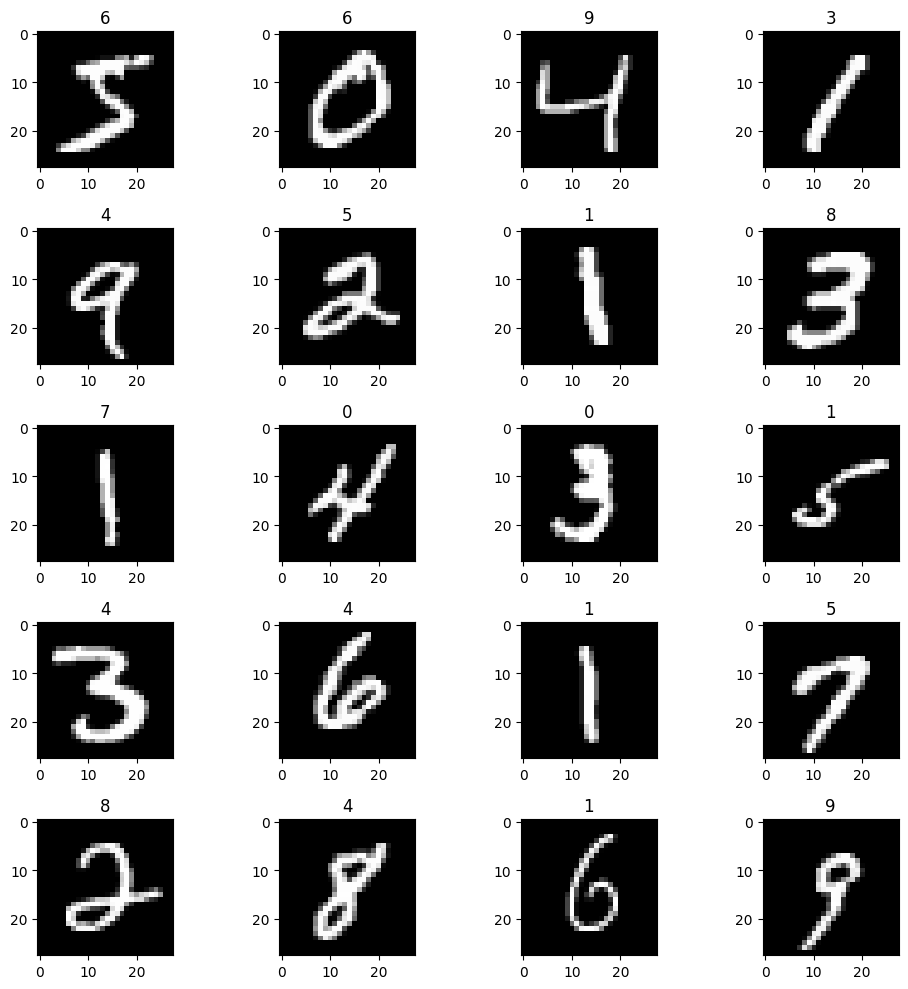

In [9]:
def show_mnist(data , labels) :
  plt.subplots(figsize=(10,10))
  for i in range(20):
    plt.subplot(5,4, i+1)
    k = np.random.randint(0 , data.shape[0])
    plt.title(labels[k])
    plt.imshow(data[k])
    plt.imshow(data[i], cmap=plt.get_cmap('gray'))
  plt.tight_layout()

  plt.show()



show_mnist(X_train , Y_train)

In [92]:

X_train = X_train.reshape(X_train.shape[0] , 28 , 28 , 1)
X_test = X_test.reshape(X_test.shape[0] , 28 , 28 , 1)


In [93]:
 # convert from integers to floats
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")



In [94]:
X_train[5].shape

(28, 28, 1)

In [95]:
Y_train[5].shape

()

In [96]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3) , activation = 'relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(210 , (3,3) , activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(280 , (3,3) , activation = 'relu'),
    tf.keras.layers.Conv2D(256 , (3,3) , activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),


    # machine learning
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [97]:
model.compile( optimizer= 'adamax',
              loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

model.fit(X_train, Y_train , epochs= 10)
model.evaluate(X_test, Y_test)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1412 - accuracy: 0.9564
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0461 - accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0318 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0261 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0210 - accuracy: 0.9935
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0170 - accuracy: 0.9947
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0148 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0124 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0109 - accuracy: 0.9966
Epoch 10/10
313/313 [==============================] - 2s 7ms/st

[0.015379238873720169, 0.9951000213623047]